In [1]:
%load_ext autoreload
%autoreload 2

This notebook look into the raw HERWIG data from the 4th paper: "paper title to be determined".

In [ ]:
import torch
from hadml import utils, datamodules
from hadml.datamodules.components.herwig import HerwigEventMultiHadronDataset
import matplotlib.pyplot as plt

In [5]:
import hadml

In [6]:
hadml.__file__

'/pscratch/sd/x/xju/Herwig/hadml/src/hadml/__init__.py'

In [7]:
data = HerwigEventMultiHadronDataset(
    "../data/Herwig",
    raw_file_list=["AllClusters_paper4.dat"],
    processed_file_name="herwig_multihadron_graph_obs_data_variation.pt",
)

Loading existing pids map:  ../data/Herwig/pids_to_ix.pkl


Processing...
Done!


In [8]:
data[0]

Data(x=[13, 8], had_kin_rest_frame=[30, 4], had_kin=[30, 4], had_type_indices=[30, 1], cluster_labels=[30])

In [9]:
data[1]

Data(x=[4, 8], had_kin_rest_frame=[14, 4], had_kin=[14, 4], had_type_indices=[14, 1], cluster_labels=[14])

In [10]:
n_clusters = []
n_hadrons = []
# n_hadrons_per_cluster = []
had_kin = []
for d in data:
    n_clusters.append(len(d.x))
    n_hadrons.append(len(d.had_kin))
    had_kin.append(d.had_kin)
had_kin = torch.cat(had_kin)

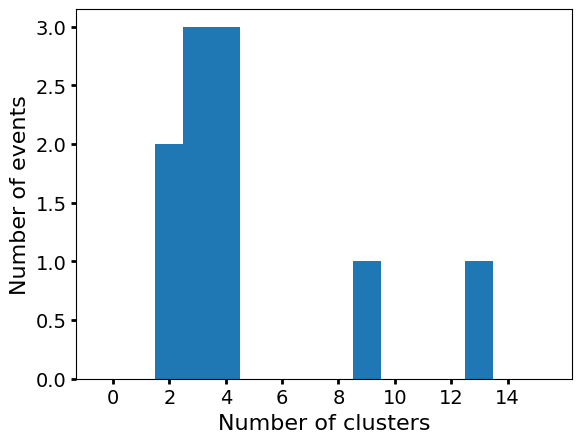

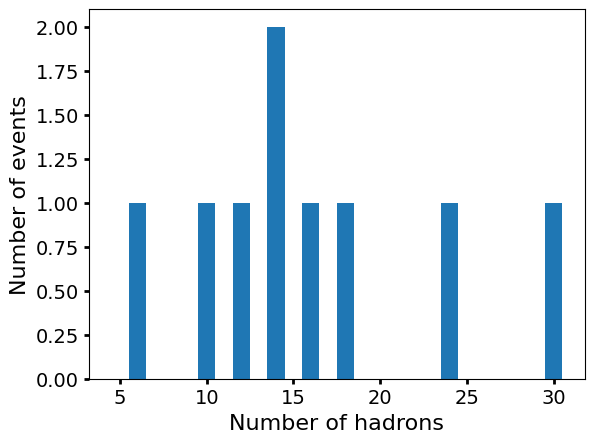

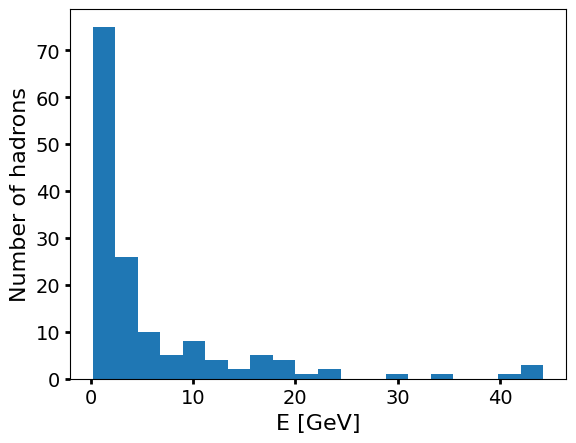

In [17]:
plt.hist(n_clusters, bins=16, range=(-0.5, 15.5))
plt.xticks(range(0, 16, 2))
plt.xlabel("Number of clusters")
plt.ylabel("Number of events")
plt.show()
plt.clf()

plt.hist(n_hadrons, bins=26, range=(4.5, 30.5))
plt.xlabel("Number of hadrons")
plt.ylabel("Number of events")
plt.show()
plt.clf()

plt.hist(had_kin[:, 0], bins=20)
plt.xlabel("E [GeV]")
plt.ylabel("Number of hadrons")
plt.show()